In [ ]:
!ls /content/drive/MyDrive/digital_car_racing/trafficSign_Data.zip

/content/drive/MyDrive/digital_car_racing/trafficSign_Data.zip


In [ ]:
!unzip /content/drive/MyDrive/digital_car_racing/trafficSign_Data.zip

Archive:  /content/drive/MyDrive/digital_car_racing/trafficSign_Data.zip
   creating: DATA/
   creating: DATA/0/
  inflating: DATA/0/010_0001.png     
  inflating: DATA/0/010_0002.png     
  inflating: DATA/0/010_0003.png     
  inflating: DATA/0/010_0004.png     
  inflating: DATA/0/010_0005.png     
  inflating: DATA/0/010_0006.png     
  inflating: DATA/0/010_0007.png     
  inflating: DATA/0/010_0008.png     
  inflating: DATA/0/010_0009.png     
  inflating: DATA/0/010_0010.png     
  inflating: DATA/0/010_0011.png     
  inflating: DATA/0/010_0012.png     
  inflating: DATA/0/010_0013.png     
  inflating: DATA/0/010_0014.png     
  inflating: DATA/0/010_0015.png     
  inflating: DATA/0/010_0016.png     
  inflating: DATA/0/010_0017.png     
  inflating: DATA/0/010_0018.png     
  inflating: DATA/0/010_0019.png     
  inflating: DATA/0/010_0020.png     
  inflating: DATA/0/010_0021.png     
  inflating: DATA/0/010_0022.png     
  inflating: DATA/0/010_0023.png     
  inflating: 

In [ ]:
!ls

DATA  drive  sample_data  TEST


In [ ]:
!ls DATA

0  1  2  3  4  5  6  7


In [ ]:
!ls TEST

0  1  2  3  4  5  6  7	sorting.py


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import os
import pathlib
import random as rn
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.applications import VGG19
import tensorflow.keras.layers as layers
from keras.models import load_model
from sklearn.metrics import accuracy_score
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
data_dir = '../input/gtsrb-german-traffic-sign/'
train_path = '/content/DATA'
test_path = '/content/TEST'
height = 50
width = 50

In [ ]:
batch_size = 16
seed = 42

In [ ]:
classes = { 0:'no go straight',
           1:'no turn left',
           2: 'no turn right',
           3: 'go straight',
           4: 'turn left',
           5: 'turn right',
           6: 'on your side',
           7: 'no entry',
           8:'wrongClass'}

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2,
                                    rotation_range=10,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,)
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
test_dataset = test_datagen.flow_from_directory(test_path,
                                                target_size=(height, width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')

Found 953 images belonging to 8 classes.
Found 53 images belonging to 8 classes.


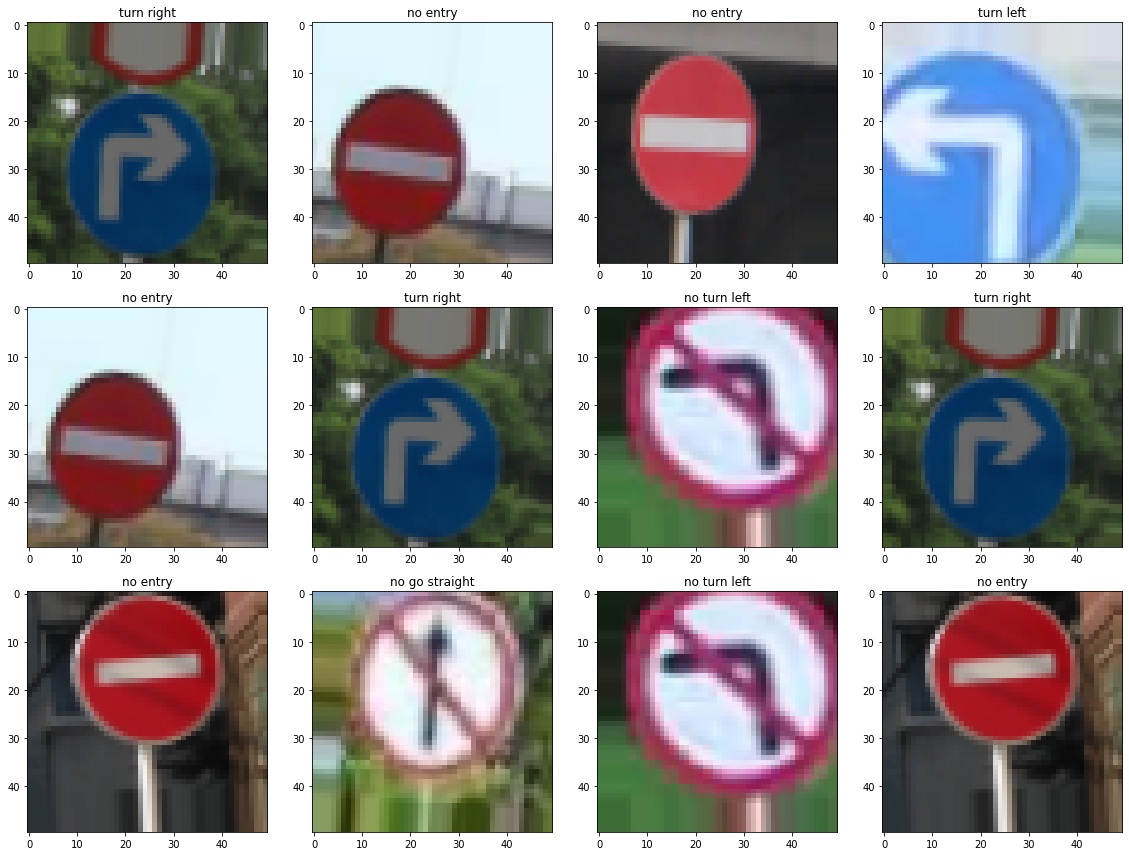

In [ ]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
img,y = train_dataset.next()
for i in range(3):
    for j in range (4):
        l=rn.randint(0,batch_size-1)
        label = classes[int(list(train_dataset.class_indices.keys())[np.argmax(y[l])])]
        ax[i,j].imshow(img[l])
        ax[i,j].set_title(label)

plt.tight_layout()

In [ ]:
base_model = tf.keras.applications.VGG16(
    weights='imagenet',
    input_shape=(height,width,3),
    include_top = False
)

base_model.trainable = True

vgg_model = tf.keras.Sequential([base_model,
                                 layers.BatchNormalization(),
                                 layers.Flatten(),
                                 layers.Dense(512, activation='sigmoid'),
                                 layers.Dense(8, activation='softmax')
                                ])

vgg_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 batch_normalization_2 (Batc  (None, 1, 1, 512)        2048      
 hNormalization)                                                 
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 14,983,496
Trainable params: 14,982,472
Non-trainable params: 1,024
______________________________________

In [ ]:
alpha=0.0001
epochs=5
optim = keras.optimizers.Adam(learning_rate=alpha)
vgg_model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
vgg_history = vgg_model.fit(train_dataset,
                        steps_per_epoch=len(train_dataset),
                        epochs=5,
                        validation_data=test_dataset,
                        validation_steps=len(test_dataset))

Epoch 1/5
60/60 [==============================] - 93s 2s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 2/5
60/60 [==============================] - 102s 2s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 3/5
60/60 [==============================] - 99s 2s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 9.5402e-04 - val_accuracy: 1.0000
Epoch 4/5
60/60 [==============================] - 92s 2s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 8.4813e-04 - val_accuracy: 1.0000
Epoch 5/5
60/60 [==============================] - 91s 2s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 8.4728e-04 - val_accuracy: 1.0000


In [ ]:
vgg_model.save('/content/drive/MyDrive/digital_car_racing/VGG.h5')

In [ ]:
vgg_model = tf.keras.models.load_model('/content/drive/MyDrive/digital_car_racing/VGG.h5')

In [ ]:
vgg_model.evaluate(test_dataset,verbose = 1)

4/4 [==============================] - 2s 320ms/step - loss: 8.4728e-04 - accuracy: 1.0000


[0.0008472764166072011, 1.0]

1/1 [==============================] - 0s 383ms/step
no entry


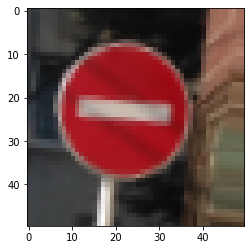

In [ ]:
img,y = train_dataset.next()
prediction = vgg_model.predict(img)[0]
plt.imshow(img[0])
label = classes[np.argmax(prediction)]
print(label)